# Notes from *Regression and Other Stories* chapter 1

In [31]:
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
%load_ext rpy2.ipython

In [22]:
%%R
library(rstanarm)

R[write to console]: Loading required package: Rcpp

R[write to console]: This is rstanarm version 2.21.1

R[write to console]: - See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

R[write to console]: - Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

R[write to console]: - For execution on a local, multicore CPU with excess RAM we recommend calling

R[write to console]:   options(mc.cores = parallel::detectCores())



In [28]:
%%R
hibbs <- read.table("ROS-Examples/ElectionsEconomy/data/hibbs.dat", header=TRUE)

M1 <- stan_glm(vote ~ growth, data=hibbs)
print(M1)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.030847 seconds (Warm-up)
Chain 1:                0.030629 seconds (Sampling)
Chain 1:              

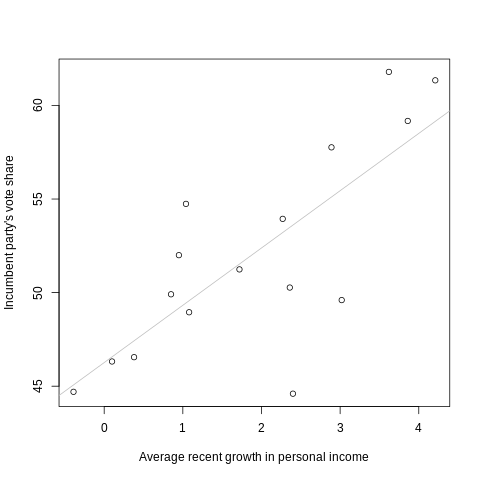

In [29]:
%%R
plot(hibbs$growth, hibbs$vote, xlab="Average recent growth in personal income",
    ylab="Incumbent party's vote share")
abline(coef(M1), col="gray")

In [36]:
hibbs = pd.read_table("ROS-Examples/ElectionsEconomy/data/hibbs.dat", sep=" ")
m1 = smf.glm(formula="vote ~ growth", data=hibbs).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   vote   No. Observations:                   16
Model:                            GLM   Df Residuals:                       14
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          14.162
Method:                          IRLS   Log-Likelihood:                -42.839
Date:                Thu, 14 Dec 2023   Deviance:                       198.27
Time:                        14:00:20   Pearson chi2:                     198.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7036
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2476      1.622     28.514      0.000      43.069      49.427
growth         3.0605      0.696      4.396      0.000       1.696       4.425
==============================================================================
"""

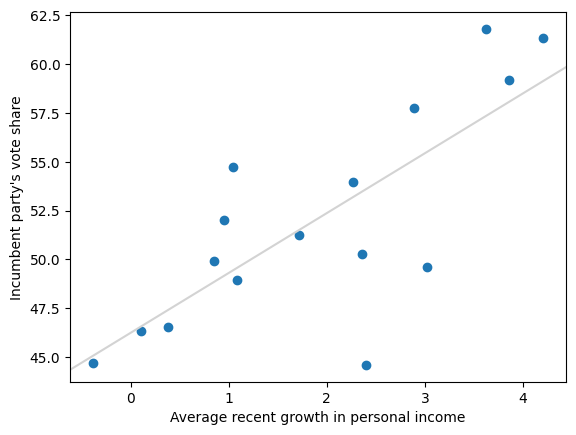

In [45]:
plt.scatter(hibbs['growth'], hibbs['vote'])
plt.axline((0, m1.params['Intercept']), slope=m1.params['growth'], c='lightgray')
plt.xlabel("Average recent growth in personal income")
plt.ylabel("Incumbent party's vote share");